In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


In [ ]:
df = pd.read_csv("/content/sample_data/survey (1).csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [ ]:
summary = pd.DataFrame({
    'Data Columns' : df.columns,
    'Data Type': df.dtypes,
    'Missing Values': df.isnull().sum(),
    'Unique Values': df.nunique()
})
summary

,Data Columns,Data Type,Missing Values,Unique Values
Timestamp,Timestamp,object,0,884
Age,Age,int64,0,53
Gender,Gender,object,0,49
Country,Country,object,0,48
state,state,object,515,45
self_employed,self_employed,object,18,2
family_history,family_history,object,0,2
treatment,treatment,object,0,2
work_interfere,work_interfere,object,264,4
no_employees,no_employees,object,0,6


DATA CLEANING

In [ ]:
df['Gender'].unique()

['female', 'male', 'other']
Categories (3, object): ['female', 'male', 'other']

In [ ]:
df['no_employees'].unique()

array(['Jun-25', 'More than 1000', '26-100', '100-500', '01-May',
       '500-1000'], dtype=object)

In [ ]:
df['Age']=pd.to_numeric(df['Age'],errors='coerce')
df['Timestamp']=pd.to_datetime(df['Timestamp'])
df['Gender'] = df['Gender'].str.lower().str.strip()
female_terms= ['female (cis)','female (cis)	','fem', 'f', 'femal','woman','femail','cis female','femake','Cis Female','Female (cis)', 'Woman','queer/she/they', 'Femake', 'cis-female/femme',]
male_terms= ['msle','guy (-ish) ^_^','man','mal','make','male (cis)','male','m','Cis Man','male,m','male-ish','cis man','Malr','maile','mail','Mail', 'cis male','malr','Male-ish','something kinda male?','Cis Male','Male (CIS)','Make','Guy (-ish) ^_^', 'man']
other_terms=['male leaning androgynous','male leaning androgyous','neuter','trans-female','unsure what that really means','trans woman','p','genderqueer','' 'A little about you','non-binary', 'Nah', 'All', 'Enby','Trans woman','Neuter', 'Female (trans)',
       'queer',
       'fluid', 'Genderqueer','female (trans)' ,'Androgyne', 'Agender',' unsure what that really means','ostensibly male, unsure what that really means','nah','enby','agender','androgyne']
df['Gender'] = df['Gender'].replace(female_terms, 'female')
df['Gender'] = df['Gender'].replace(male_terms, 'male')
df['Gender'] = df['Gender'].replace(other_terms, 'other')
df.replace(['', 'N/A', 'n/a', 'Na',"Don't know","Maybe","Some of them"], np.nan, inplace=True)
df = df[(df['Age'] >= 18) & (df['Age'] <= 100)]
df['treatment'] = df['treatment'].replace({'Yes': True, 'No': False})
df['treatment'] = df['treatment'].astype(bool)
df = df.apply(lambda col: col.str.strip() if col.dtype == "object" else col)
df.drop_duplicates(inplace=True)
df['no_employees'] = (
    df['no_employees']
    .astype(str)
    .str.strip()
    .str.lower()
    .replace({'jun-25': 'nan','01-May': 'nan'}
    ))
df['Gender'] = df['Gender'].astype('category')
df['no_employees'] =df['no_employees'].astype('category')
df['Country'] = df['Country'].astype('category')
df['mental_health_consequence'] = df['mental_health_consequence'].astype('category')
df['phys_health_consequence'] = df['phys_health_consequence'].astype('category')
df['coworkers'] = df['coworkers'].astype('category')
df['supervisor'] = df['supervisor'].astype('category')
df['mental_health_interview'] = df['mental_health_interview'].astype('category')
df['phys_health_interview'] = df['phys_health_interview'].astype('category')
df['mental_vs_physical'] = df['mental_vs_physical'].astype('category')
df['obs_consequence'] = df['obs_consequence'].astype('category')
df['remote_work']=df['remote_work'].astype('bool')
df['tech_company']=df['tech_company'].astype('bool')
df['seek_help']=df['seek_help'].astype('bool')
df['self_employed']=df['self_employed'].astype('bool')
df['family_history']=df['family_history'].astype('bool')
df['work_interfere']=df['work_interfere'].astype('category')
df['benefits']=df['benefits'].astype('category')
df['care_options']=df['care_options'].astype('category')
df['leave']=df['leave'].astype('category')
df['comments']=df['comments'].astype('object')

df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:00,37,female,United States,IL,True,True,True,Often,nan,...,Somewhat easy,No,No,NaN,Yes,No,NaN,Yes,No,NaN
1,2014-08-27 11:29:00,44,male,United States,IN,True,True,False,Rarely,more than 1000,...,NaN,NaN,No,No,No,No,No,NaN,No,NaN
2,2014-08-27 11:29:00,32,male,Canada,NaN,True,True,False,Rarely,nan,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:00,31,male,United Kingdom,NaN,True,True,True,Often,26-100,...,Somewhat difficult,Yes,Yes,NaN,No,NaN,NaN,No,Yes,NaN
4,2014-08-27 11:30:00,31,male,United States,TX,True,True,False,Never,100-500,...,NaN,No,No,NaN,Yes,Yes,Yes,NaN,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:00,26,male,United Kingdom,NaN,True,True,True,NaN,26-100,...,Somewhat easy,No,No,NaN,NaN,No,No,NaN,No,NaN
1255,2015-09-26 01:07:00,32,male,United States,IL,True,True,True,Often,26-100,...,Somewhat difficult,No,No,NaN,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:00,34,male,United States,CA,True,True,True,Sometimes,more than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:00,46,female,United States,NC,True,True,False,NaN,100-500,...,NaN,Yes,No,No,No,No,No,No,No,NaN


In [ ]:
df['no_employees'].value_counts(dropna=False)





,count
no_employees,
26-100,734
more than 1000,281
100-500,175
500-1000,60


In [ ]:
df.isnull().sum()


,0
Timestamp,0
Age,0
Gender,0
Country,0
state,0
self_employed,0
family_history,0
treatment,0
work_interfere,0
no_employees,0


In [ ]:
df['Gender'].value_counts(normalize=True)*100

,proportion
Gender,
male,78.96
female,19.84
other,1.20


What is the overall gender distribution of survey respondents?

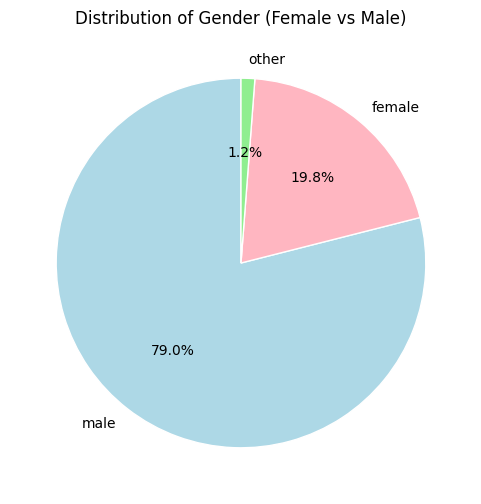

In [ ]:

gender_counts = df['Gender'].value_counts(dropna=False)

plt.figure(figsize=(6,6))
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightblue', 'lightpink','lightgreen'],
    wedgeprops={'edgecolor': 'white'}
)
plt.title('Distribution of Gender (Female vs Male)')
plt.show()


Most respondents are male, confirming the gender imbalance in the technology industry.

How do reported mental-health consequences differ between male, female, and other respondents?

In [ ]:
import plotly.express as px

fig = px.histogram(
    df,
    x='Gender',
    color='mental_health_consequence',
    barmode='group',
    title='Mental Health Consequences by Gender',
    width=700,
    height=500
)

fig.update_layout(
    xaxis_title='Gender',
    yaxis_title='Number of Responses',
    legend_title='Reported Consequence'
)

fig.show()


Are remote workers more or less likely to report mental-health consequences?

In [ ]:
fig = px.histogram(
    df,
    x='remote_work',
    color='mental_health_consequence',
    barmode='group',
    title='Remote Work and Mental Health Consequences'
)
fig.show()


Remote workers show a slightly higher likelihood of reporting mental health consequences compared to non-remote workers.

How does age relate to reported mental-health consequences, and does gender affect this relationship?

In [ ]:


df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
d = df[['Age','mental_health_consequence','Gender']].dropna()
order = ['No','Maybe','Yes']

fig = px.violin(
    d,
    x='mental_health_consequence',
    y='Age',
    color='Gender',
    box=True,
    points='all',
    category_orders={'mental_health_consequence': order},
    title='Age vs Mental Health Consequences by Gender (Violin)'
)
fig.update_layout(xaxis_title='Mental Health Consequence', yaxis_title='Age')
fig.show()


Respondents aged 25–40 are the most likely to report mental health consequences, especially among females.

is there a relationship between employee age, company size, and likelihood of seeking treatment?

In [ ]:

size_map = {'1-5':3, '6-25':15, '26-100':63, '100-500':300, '500-1000':750, 'More than 1000':1200}
df['company_size'] = df['no_employees'].map(size_map)

fig = px.scatter(
    df, x='Age', y='company_size', color='treatment',
    title='Age vs Company Size (colored by Treatment)',
    labels={'company_size':'Approximate Company Size'}
)
fig.show()


No strong relationship exists between age or company size and seeking treatment, suggesting other factors drive treatment decisions.

In [ ]:
 How does the distribution of mental-health treatment vary across countries and company sizes?

In [ ]:
temp_df = df.copy()
temp_df['no_employees_treemap'] = temp_df['no_employees'].astype(str).replace({'nan': 'Not Specified'})

fig = px.treemap(
    temp_df,
    path=['Country','no_employees_treemap','treatment'],
    title='Mental Health Treatment by Country and Company Size'
)
fig.show()

/usr/local/lib/python3.12/dist-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/usr/local/lib/python3.12/dist-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/usr/local/lib/python3.12/dist-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Respondents from Western countries and larger companies report higher rates of treatment seeking.

What percentage of employees within each company size have sought mental-health treatment?

In [ ]:

employee_order = ['26-100', '100-500', '500-1000', 'more than 1000']

df['no_employees'] = pd.Categorical(df['no_employees'], categories=employee_order, ordered=True)

fig = px.histogram(
    df,
    x='no_employees',
    color='treatment',
    barmode='stack',
    histnorm='percent',
    category_orders={'no_employees': employee_order},
    title='Treatment Rate by Company Size (%)',
    height=500,
    width=800
)

fig.update_layout(
    yaxis_title='Percentage',
    xaxis_title='Number of Employees'
)

fig.show()

Medium-sized companies (26–500 employees) have the highest treatment rates, while very small and very large companies lag behind.

Does age influence how often mental-health issues interfere with work, and does this differ for those in treatment?

In [ ]:
fig = px.violin(
    df, x='work_interfere', y='Age', color='treatment',
    box=True, points='all',
    category_orders={'work_interfere':['Never','Rarely','Sometimes','Often']},
    title='Age vs Work Interference (colored by Treatment)'
)
fig.update_layout(xaxis_title='Work interference', yaxis_title='Age')
fig.show()


Younger employees and those already receiving treatment report higher levels of work interference.

What is the overall age distribution for each gender group?

In [ ]:
gender_colors = {'female': 'lightpink', 'male': 'lightblue', 'other': 'lightgreen'}

fig = px.histogram(
    df,
    x="Age",
    color="Gender",
    title="Age Distribution by Gender",
    color_discrete_map=gender_colors,
    width=700, height=500
)
fig.update_layout(
    xaxis_title="Age",
    yaxis_title="Count",
    legend_title="Gender",
    bargap=0.2, title_x=0.5
)
fig.show()

Most respondents are in their 20s and 30s, with male participants dominating all age groups.

How does the proportion of people receiving treatment differ across genders?

In [ ]:
px.histogram(df, x='Gender', color='treatment', barmode='group', text_auto=True,
             title='Treatment Counts by Gender').show()


Men and women have nearly equal treatment counts when adjusted for the dataset’s male majority.

In [ ]:
treatment_rate_by_gender = df.groupby('Gender', observed=False)['treatment'].mean().reset_index(name='treatment_rate')

fig = px.bar(
    treatment_rate_by_gender,
    x='Gender',
    y='treatment_rate',
    color='Gender',
    text='treatment_rate',
    title='Treatment Rate by Gender',
)

fig.update_traces(texttemplate='%{text:.1%}', textposition='outside')
fig.update_yaxes(tickformat='.0%', range=[0, 1])
fig.show()

The percentage of people seeking treatment is roughly equal for males and females, around one-third of each group

Within each gender, what proportion of respondents report a family history of mental illness?

In [ ]:
fig = px.histogram(
    df.dropna(subset=["Gender", "family_history"]),
    x="Gender",
    color="family_history",
    barmode="stack",
    title="Family History by Gender",
    width=700, height=500
)
fig.update_layout(
    xaxis_title="Gender",
    yaxis_title="Count",
    legend_title="Family History",
    bargap=0.2, title_x=0.5
)
fig.show()


Females report a family history of mental illness slightly more often than males, suggesting awareness differences.

How does company size relate to the frequency of work interference from mental-health issues?

In [ ]:
tmp = df.dropna(subset=["no_employees", "work_interfere"])
fig = px.density_heatmap(
    tmp,
    x="no_employees",
    y="work_interfere",
    title="Company Size vs Work Interference (Count Heatmap)",
    width=850, height=550
)
fig.update_layout(
    xaxis_title="Company Size (no_employees)",
    yaxis_title="Work Interference",
    title_x=0.5
)
fig.show()


Employees in larger companies report more frequent interference of mental health issues with work.

Which countries have the most respondents reporting mental-health consequences?

In [ ]:
tmp = (df[df["mental_health_consequence"].eq("Yes")]
       .groupby("Country", as_index=False).size()
       .rename(columns={"size":"Count"})
       .sort_values("Count", ascending=False).head(15))
fig = px.bar(
    tmp.sort_values("Count"),
    x="Count", y="Country",
    orientation="h",
    title="Countries with Highest Reported Mental Health Consequences (Yes)",
    width=900, height=600
)
fig.update_layout(
    xaxis_title="Count",
    yaxis_title="Country",
    title_x=0.5
)
fig.show()


/tmp/ipython-input-4207929054.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



The USA, UK, and Canada have the highest number of respondents reporting mental health consequences.

Does feeling supported by a supervisor influence whether respondents seek mental-health treatment?

In [ ]:
tmp = (df.dropna(subset=["supervisor","treatment"])
         .groupby(["supervisor","treatment"], as_index=False)
         .size().rename(columns={"size":"Count"}))
fig = px.bar(
    tmp,
    x="supervisor", y="Count",
    color="treatment",
    barmode="group",
    title="Supervisor Support vs Treatment",
    width=800, height=500
)
fig.update_layout(
    xaxis_title="Supervisor Support",
    yaxis_title="Count",
    legend_title="Treatment",
    title_x=0.5
)
fig.show()


/tmp/ipython-input-2066892653.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



 Do employees in tech companies report receiving mental-health benefits more often than non-tech workers?

In [ ]:
fig = px.histogram(
    df.dropna(subset=["tech_company","benefits"]),
    x="tech_company",
    color="benefits",
    barmode="stack",
    title="Benefits by Tech Company Status",
    width=800, height=500
)
fig.update_layout(
    xaxis_title="Tech Company",
    yaxis_title="Count",
    legend_title="Benefits",
    bargap=0.2, title_x=0.5
)
fig.show()


In which countries do people most strongly agree that mental and physical health are equally important?

In [ ]:

counts = (df.dropna(subset=["Country","mental_vs_physical"])
            .groupby(["Country","mental_vs_physical"]).size()
            .reset_index(name="n"))
total = counts.groupby("Country", as_index=False)["n"].sum().rename(columns={"n":"N"})
yes = counts[counts["mental_vs_physical"].eq("Yes")][["Country","n"]].rename(columns={"n":"Yes"})
perc = total.merge(yes, on="Country", how="left").fillna({"Yes":0})
perc["Pct_Yes"] = 100 * perc["Yes"] / perc["N"]
top = perc.sort_values("Pct_Yes", ascending=False).head(15)

fig = px.bar(
    top,
    x="Country", y="Pct_Yes",
    title="Countries with Highest % 'Yes' on Mental vs Physical Health",
    text="Pct_Yes",
    width=1000, height=500
)
fig.update_traces(texttemplate="%{text:.1f}%", textposition="outside")
fig.update_layout(
    xaxis_title="Country",
    yaxis_title="% Yes",
    bargap=0.2, title_x=0.5
)
fig.show()


/tmp/ipython-input-2850226112.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipython-input-2850226112.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Does having an anonymity policy correlate with employees’ perceived ease of taking mental-health leave?

In [ ]:
ct = (df.dropna(subset=["anonymity","leave"])
        .groupby(["anonymity","leave"]).size()
        .reset_index(name="Count"))

fig = px.density_heatmap(
    ct,
    x="anonymity",
    y="leave",
    z="Count",
    title="Anonymity Policy vs Ease of Taking Leave (Count Heatmap)",
    width=850, height=550
)
fig.update_layout(
    xaxis_title="Anonymity Policy",
    yaxis_title="Ease of Leave",
    title_x=0.5
)
fig.show()


/tmp/ipython-input-2998221561.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Does offering mental-health benefits increase employees’ willingness to seek professional help?

In [ ]:
tmp = df.dropna(subset=["benefits","seek_help"])
fig = px.histogram(
    tmp,
    x="benefits",
    color="seek_help",
    barmode="stack",
    title="Benefits vs Willingness to Seek Help",
    width=850, height=500
)
fig.update_layout(
    xaxis_title="Benefits Provided",
    yaxis_title="Count",
    legend_title="Seek Help",
    title_x=0.5, bargap=0.2
)
fig.show()


Do tech-company employees report different levels of work interference compared to non-tech employees?

In [ ]:
tmp = (df.dropna(subset=["tech_company","work_interfere"])
         .groupby(["tech_company","work_interfere"]).size()
         .reset_index(name="Count"))

fig = px.bar(
    tmp,
    x="tech_company", y="Count",
    color="work_interfere",
    barmode="group",
    title="Tech Company Status vs Work Interference",
    width=900, height=500
)
fig.update_layout(
    xaxis_title="Tech Company",
    yaxis_title="Count",
    legend_title="Work Interference",
    title_x=0.5
)
fig.show()


/tmp/ipython-input-3107604108.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Non-tech employees report more frequent work interference than those in tech companies.

In [ ]:
fig = px.pie(
    df.dropna(subset=["benefits"]),
    names="benefits",
    title="Benefits Availability",
    hole=0.4,
    width=600, height=500
)
fig.update_layout(title_x=0.5, legend_title="Benefits")
fig.show()


Most respondents have access to mental health benefits, but a significant minority still lack such support.